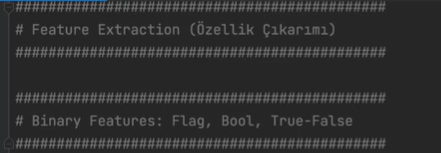

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)






In [2]:


def load():
    data = pd.read_csv("../datasets/titanic.csv")
    return data


df = load()
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [3]:
df["NEW_CABIN_BOOL"] =df["Cabin"].notnull().astype('int')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_CABIN_BOOL
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0


In [5]:
df.groupby("NEW_CABIN_BOOL").agg({"Survived":"mean"})

,Survived
NEW_CABIN_BOOL,
0,0.300
1,0.667


In [9]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.8 MB 3.1 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/9.8 MB 3.7 MB/s eta 0:00:03
   ----------- ---------------------------- 2.9/9.8 MB 3.9 MB/s eta 0:00:02
   ---------------- ----------------------- 3.9/9.8 MB 4.1 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.8 MB 4.2 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.8 MB 4.3 MB/s eta 0:00:01
   ---------------------------- ----------- 7.1/9.8 MB 4.4 MB/s eta 0:00:01
   -------------------------------- ------- 7.9/9.8 MB 4.4 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.8 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 4.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from statsmodels.stats.proportion import proportions_ztest

# Test istatistiği ve p-değerini hesaplama
test_stat, pvalue = proportions_ztest(
    count=[
        df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].sum(),
        df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].sum()
    ],
    nobs=[
        df.loc[df["NEW_CABIN_BOOL"] == 1, "Survived"].shape[0],
        df.loc[df["NEW_CABIN_BOOL"] == 0, "Survived"].shape[0]
    ]
)

# Sonucu ekrana yazdırma
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))


Test Stat = 9.4597, p-value = 0.0000


In [13]:
df.loc[((df['SibSp']+df['Parch'])>0),"NEW_IS_ALONE" ] = "NO"
df.loc[((df['SibSp']+df['Parch'])==0),"NEW_IS_ALONE" ] = "YES"

In [16]:
df=load()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [19]:
df['NEW_TITLE'] = df.Name.str.extract('([A-Za-z]+)\\.', expand=False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NEW_TITLE
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,Mr


In [20]:
df[["NEW_TITLE", "Survived", "Age"]].groupby("NEW_TITLE").agg({
    "Survived": "mean",
    "Age": ["count", "mean"]
})


Survived   Age       
              mean count   mean
NEW_TITLE                      
Capt         0.000     1 70.000
Col          0.500     2 58.000
Countess     1.000     1 33.000
Don          0.000     1 40.000
Dr           0.429     6 42.000
Jonkheer     0.000     1 38.000
Lady         1.000     1 48.000
Major        0.500     2 48.500
Master       0.575    36  4.574
Miss         0.698   146 21.774
Mlle         1.000     2 24.000
Mme          1.000     1 24.000
Mr           0.157   398 32.368
Mrs          0.792   108 35.898
Ms           1.000     1 28.000
Rev          0.000     6 43.167
Sir          1.000     1 49.000

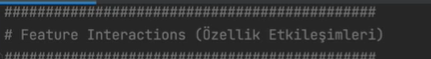